# Question about data what is the problem !!
-
-
-

# Import all Library

install y-data-profiling for quick EDA information

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=fc8b02e68bc65cbdf461e73cc98e8406dac0f8fe0307030632a6d31d034a99e8
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

from sklearn.preprocessing import MinMaxScaler

import scipy.stats as stats
from scipy.stats import skew , kurtosis

from ydata_profiling import ProfileReport

# Function

## Analyst H0 vs H1

In [ ]:
def chi_square_test(df, col1, col2):
    """
    Chi-square test untuk menguji hubungan antara dua variabel kategorikal.
    """
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi2 Statistic: {chi2:.4f}")
    print(f"P-Value: {p:.4f}")
    if p < 0.05:
        print("Tolak H0: Ada hubungan antara", col1, "dan", col2)
    else:
        print("Gagal tolak H0: Tidak ada hubungan antara", col1, "dan", col2)

def t_test_independent(df, col_numeric, col_group):
    """
    Independent T-Test untuk menguji perbedaan rata-rata dua grup.
    """
    unique_groups = df[col_group].dropna().unique()
    if len(unique_groups) != 2:
        raise ValueError("Kolom grup harus memiliki tepat 2 kategori untuk t-test.")
    group1 = df[df[col_group] == unique_groups[0]][col_numeric].dropna()
    group2 = df[df[col_group] == unique_groups[1]][col_numeric].dropna()
    t_stat, p_val = stats.ttest_ind(group1, group2)
    print(f"T-Statistic: {t_stat:.4f}")
    print(f"P-Value: {p_val:.4f}")
    if p_val < 0.05:
        print(f"Tolak H0: Ada perbedaan rata-rata {col_numeric} antara {unique_groups[0]} dan {unique_groups[1]}")
    else:
        print(f"Gagal tolak H0: Tidak ada perbedaan rata-rata {col_numeric} antara {unique_groups[0]} dan {unique_groups[1]}")

def anova_test(df, col_numeric, col_group):
    """
    ANOVA Test untuk menguji perbedaan rata-rata lebih dari dua grup.
    """
    unique_groups = df[col_group].dropna().unique()
    if len(unique_groups) < 3:
        raise ValueError("Gunakan t-test jika hanya ada 2 kategori.")
    groups_data = [df[df[col_group] == g][col_numeric].dropna() for g in unique_groups]
    f_stat, p_val = stats.f_oneway(*groups_data)
    print(f"F-Statistic: {f_stat:.4f}")
    print(f"P-Value: {p_val:.4f}")
    if p_val < 0.05:
        print(f"Tolak H0: Setidaknya satu grup dalam {col_group} memiliki rata-rata {col_numeric} yang berbeda")
    else:
        print(f"Gagal tolak H0: Tidak ada perbedaan signifikan rata-rata {col_numeric} antar grup di {col_group}")

def pearson_correlation(df, col_numeric1, col_numeric2):
    """
    Pearson Correlation untuk menguji hubungan linier antar dua variabel numerik.
    """
    corr_coef, p_val = stats.pearsonr(df[col_numeric1].dropna(), df[col_numeric2].dropna())
    print(f"Correlation Coefficient: {corr_coef:.4f}")
    print(f"P-Value: {p_val:.4f}")
    if p_val < 0.05:
        print(f"Tolak H0: Ada hubungan signifikan antara {col_numeric1} dan {col_numeric2}")
    else:
        print(f"Gagal tolak H0: Tidak ada hubungan signifikan antara {col_numeric1} dan {col_numeric2}")

def one_sample_t_test(df, col_numeric, population_mean):
    """
    One Sample T-Test untuk menguji apakah rata-rata kolom berbeda dari nilai tertentu.

    - col_numeric: nama kolom numerik
    - population_mean: nilai rata-rata populasi yang ingin dibandingkan
    """
    sample_data = df[col_numeric].dropna()
    t_stat, p_val = stats.ttest_1samp(sample_data, population_mean)
    print(f"T-Statistic: {t_stat:.4f}")
    print(f"P-Value: {p_val:.4f}")
    if p_val < 0.05:
        print(f"Tolak H0: Rata-rata {col_numeric} berbeda secara signifikan dari {population_mean}")
    else:
        print(f"Gagal tolak H0: Tidak ada perbedaan signifikan rata-rata {col_numeric} dari {population_mean}")


## IQR (Outlier Check)

In [ ]:
def skewness_kurtosis(df, col_numeric):
    data = df[col_numeric].dropna()
    skew = stats.skew(data)
    kurt = stats.kurtosis(data)
    print(f"Skewness: {skew:.4f}")
    print(f"Kurtosis: {kurt:.4f}")
    if abs(skew) > 1:
        print("Distribusi sangat miring (skewed)")
    elif abs(skew) > 0.5:
        print("Distribusi agak miring (moderately skewed)")
    else:
        print("Distribusi mendekati simetris")

def iqr_summary(df, col_numeric):
    data = df[col_numeric]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(f"IQR: {iqr:.4f}")
    print(f"Lower Bound: {lower_bound:.4f}")
    print(f"Upper Bound: {upper_bound:.4f}")
    print(f"Jumlah Outlier: {(data < lower_bound).sum() + (data > upper_bound).sum()}")

def remove_outliers_iqr(df, col_numeric):
    data = df[col_numeric]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_clean = df[(df[col_numeric] >= lower_bound) & (df[col_numeric] <= upper_bound)].copy()
    print(f"Data asli: {len(df)}, Setelah hapus outlier: {len(df_clean)}")
    return df_clean

# Data Wrangling

## Data Gathering

**SUB-TASK**

---


This data i got from kaggle [Top Spoty Listener](https://www.kaggle.com/datasets/anandshaw2001/top-spotify-songs-in-countries?select=spotify_history.csv)
- we will download with kagglehub


In [ ]:
!pip install kagglehub

In [ ]:
import kagglehub
path = kagglehub.dataset_download("anandshaw2001/top-spotify-songs-in-countries")
print(path)

/kaggle/input/top-spotify-songs-in-countries


In [ ]:
df = pd.read_csv("/kaggle/input/top-spotify-songs-in-countries/spotify_history.csv")

## Data Assessing

**SUB-TASK**
- Before we analyst should know about data, it's clean,duplicated, or missing value and also check typeData  

In [ ]:
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [ ]:
df.isnull().sum()

,0
spotify_track_uri,0
ts,0
platform,0
ms_played,0
track_name,0
artist_name,0
album_name,0
reason_start,143
reason_end,117
shuffle,0


In [ ]:
df.isnull().sum() / len(df) * 100

,0
spotify_track_uri,0.000000
ts,0.000000
platform,0.000000
ms_played,0.000000
track_name,0.000000
artist_name,0.000000
album_name,0.000000
reason_start,0.095422
reason_end,0.078073
shuffle,0.000000


In [ ]:
df.duplicated().sum()

np.int64(1185)

## Data Cleaning

**SUB-TASK**

---


we got some info about data
- Wrong type data column (ts) we will change it to DateTime
- we will drop column spotify_track_uri because we will not use no informative
- reason_start and reason_end have null data less than < 1% so we will fill null data with mode data. because it's category data
- and also we have duplicates data and we will drop it

In [ ]:
df = df.drop(columns=["spotify_track_uri"])

In [ ]:
df['ts'] = pd.to_datetime(df['ts'])

In [ ]:
df['reason_start'] = df['reason_start'].fillna(df['reason_start'].mode()[0])
df['reason_end'] = df['reason_end'].fillna(df['reason_end'].mode()[0])

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148675 entries, 0 to 149859
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ts            148675 non-null  datetime64[ns]
 1   platform      148675 non-null  object        
 2   ms_played     148675 non-null  int64         
 3   track_name    148675 non-null  object        
 4   artist_name   148675 non-null  object        
 5   album_name    148675 non-null  object        
 6   reason_start  148675 non-null  object        
 7   reason_end    148675 non-null  object        
 8   shuffle       148675 non-null  bool          
 9   skipped       148675 non-null  bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(6)
memory usage: 10.5+ MB


# Exploration Data Analysis (EDA)

## Explore

**SUB-TASK**

---

Now we will explore about data we will analyst to get insight
- we will using ProfileReport to get quick more informative about data


In [ ]:
profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:06<00:00,  1.61it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file("output.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**FAST EDA INSIGHT**


---
- ms_played have alot 0 time before skiped we will check what the reason
- the most spotify used is android user
- and we will check the artist_name,track_name and album_name top 10 who most skipped


# Visualization

visual ts what time user in weekday,hour, and month(we will change it to name month)

In [ ]:
df['day_of_week'] = df['ts'].dt.day_name()
df['hour'] = df['ts'].dt.hour
df['month'] = df['ts'].dt.month_name()

/tmp/ipython-input-21-2702157616.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
/tmp/ipython-input-21-2702157616.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


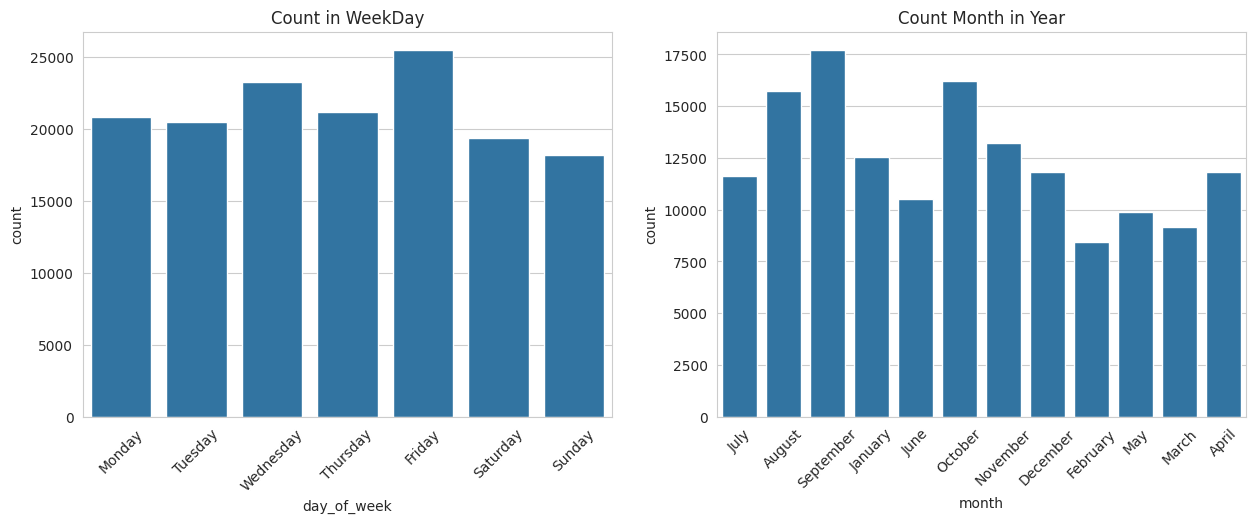

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data=df, x='day_of_week', ax=ax[0])
sns.countplot(data=df, x='month', ax=ax[1])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[0].set_title('Count in WeekDay')
ax[1].set_title('Count Month in Year')
plt.show()

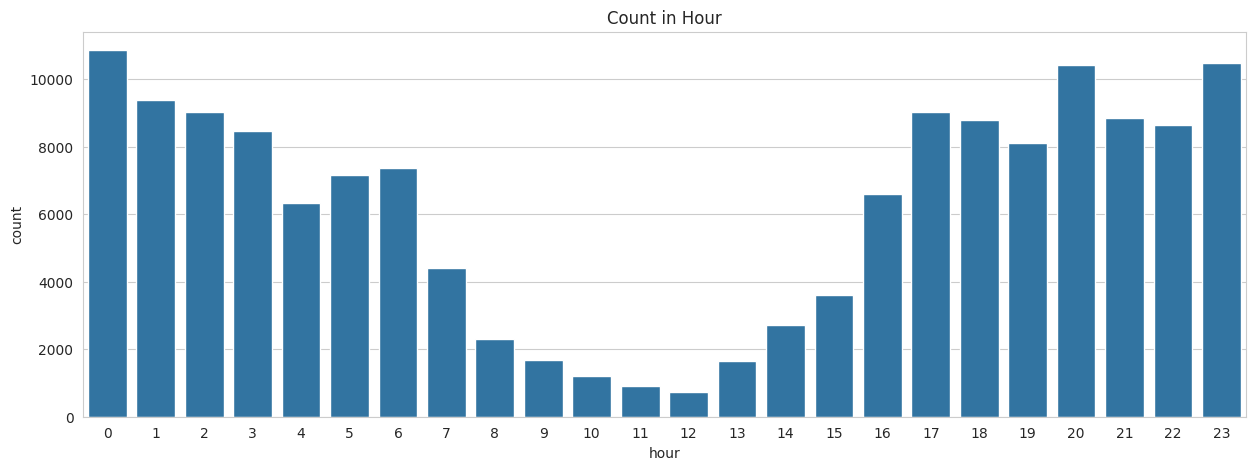

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='hour')
plt.title('Count in Hour')
plt.show()

# Conclusion

#ETL Google BigQuery
now because we have been extract tranform
i want to create pipeline ETL to load my google bigquery

In [ ]:
from google.colab import  auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
from google.cloud import bigquery
from pandas_gbq import to_gbq

In [ ]:
project_id = 'learning-data-enginner'
table_name = 'my_dataset.spotify-listener'

In [ ]:
to_gbq(df,table_name,project_id,if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 8981.38it/s]
